In [2]:
#importing important packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score

import imblearn
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

IMPORTING **DATASET**

In [3]:
#reading the dataset
df=pd.read_csv("train.csv")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
df.shape

(45211, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

*** FOR EACH COLUMN***
1. Checking unique value, null value, outliers
2. Checking correct data type

In [7]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [8]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [9]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [10]:
df['job']=df['job'].replace('unknown','blue-collar')

In [11]:
df.job.value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [12]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [13]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [14]:
df.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [15]:
df.education_qual.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [16]:
df['education_qual']=df['education_qual'].replace('unknown','secondary')
df.education_qual.value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education_qual, dtype: int64

In [17]:
df.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [18]:
df.call_type.value_counts()  #unkown call type high, so no treating the unknown

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [19]:
df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [20]:
df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [21]:
df.prev_outcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [22]:
df.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [23]:
df.dur.unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [24]:
df.dur.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [25]:
df.num_calls.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [26]:
df.num_calls.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [27]:
# removing outliers
iqr=df.num_calls.quantile(0.75)-df.num_calls.quantile(0.25)
print("IQR : ",iqr)
upper=df.num_calls.quantile(0.75)+(1.5*iqr)
lower=df.num_calls.quantile(0.75)-(1.5*iqr)
print("Upper :", upper, "Lower :",lower)

print("Sum of num of call above Upper thershold :", sum(df.num_calls>upper))

df.num_calls=df.num_calls.clip(lower,upper)
df.num_calls.describe()

IQR :  2.0
Upper : 6.0 Lower : 0.0
Sum of num of call above Upper thershold : 3064


count    45211.000000
mean         2.392228
std          1.600111
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

In [28]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [29]:
# Datatype
df['y']=df['y'].map({'yes':1, 'no':0})
#df['target']=df.y

In [30]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,0


DATA CLEANING

In [31]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [32]:
df=df.dropna()

In [33]:
df=df.drop_duplicates()

In [34]:
df.shape

(45202, 11)

**EDA AND DATA ENCODING**

***FEATURE V/S DATA***

Text(0, 0.5, 'TARGET')

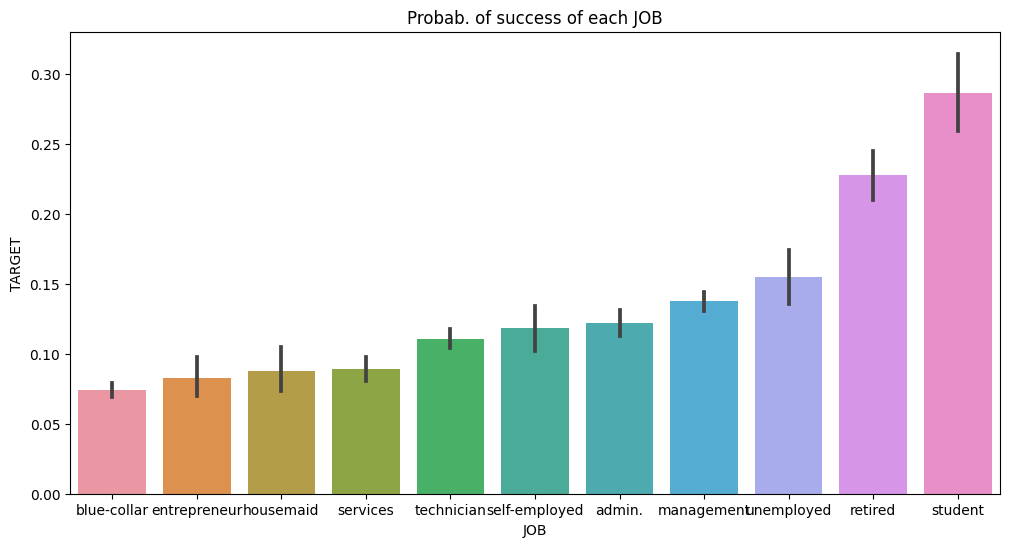

In [35]:
#PLOTTING CONVERSION RATE : JOB
job_conversion_rates = df.groupby('job')['y'].mean()
sorted_jobs = job_conversion_rates.reset_index().sort_values('y')['job']
plt.figure(figsize=(12,6))
plt.title('Probab. of success of each JOB')
sns.barplot(x='job', y='y', data=df, order=sorted_jobs)
plt.xlabel("JOB")
plt.ylabel("TARGET")

In [36]:
# Label encoding
df['job']=df['job'].map({'blue-collar':0, 'entrepreneur':1, 'housemaid':2, 'services':3, 'technician':4,'self-employed':5,
                         'admin.':6, 'management':7, 'unemployed':8, 'retired':9, 'student':10})

Text(0, 0.5, 'TARGET')

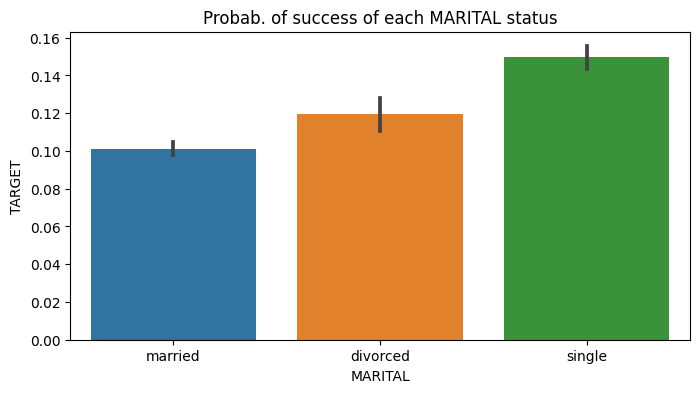

In [37]:
#PLOTTING CONVERSION RATE :Marital
job_conversion_rates=df.groupby('marital')['y'].mean()
sorted_jobs=job_conversion_rates.reset_index().sort_values('y')['marital']
plt.figure(figsize=(8,4))
plt.title('Probab. of success of each MARITAL status')
sns.barplot(x='marital', y='y', data=df, order=sorted_jobs)
plt.xlabel("MARITAL")
plt.ylabel("TARGET")

In [38]:
# Label encoding
df['marital']=df['marital'].map({'married':0, 'divorced':1, 'single':2})

Text(0, 0.5, 'TARGET')

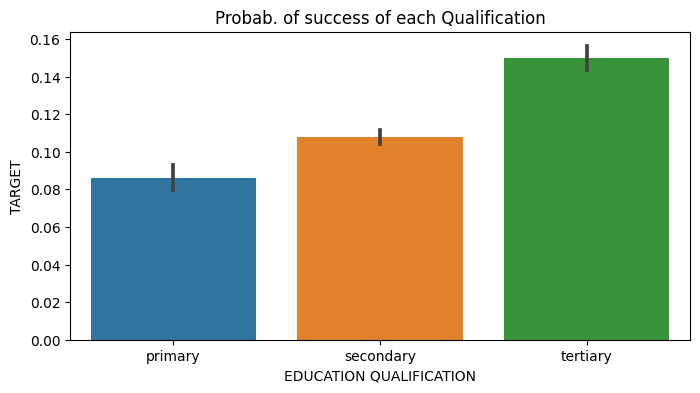

In [39]:
#PLOTTING CONVERSION RATE :EDUCATION QUALIFICATION
job_conversion_rates = df.groupby('education_qual')['y'].mean()
sorted_jobs = job_conversion_rates.reset_index().sort_values('y')['education_qual']
plt.figure(figsize=(8,4))
plt.title('Probab. of success of each Qualification')
sns.barplot(x='education_qual', y='y', data=df, order=sorted_jobs)
plt.xlabel("EDUCATION QUALIFICATION")
plt.ylabel("TARGET")

In [40]:
# Label encoding
df['education_qual']=df['education_qual'].map({'primary':0, 'secondary':1, 'tertiary':2})

Text(0, 0.5, 'TARGET')

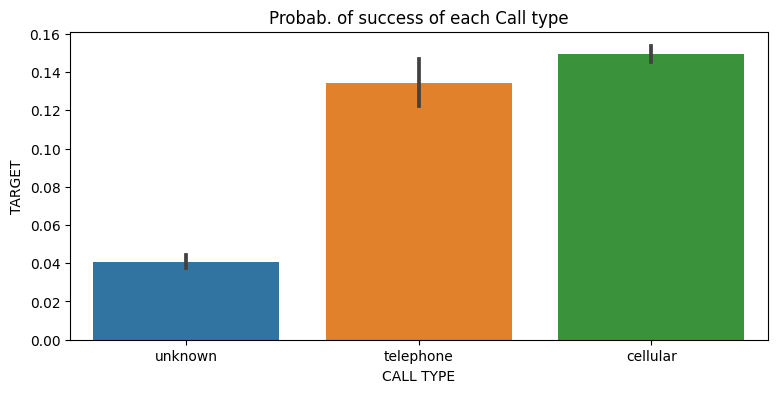

In [41]:
#PLOTTING CONVERSION RATE : CALL TYPE
job_conversion_rates = df.groupby('call_type')['y'].mean()
sorted_jobs = job_conversion_rates.reset_index().sort_values('y')['call_type']
plt.figure(figsize=(9,4))
plt.title('Probab. of success of each Call type')
sns.barplot(x='call_type', y='y', data=df, order=sorted_jobs)
plt.xlabel("CALL TYPE")
plt.ylabel("TARGET")

In [42]:
# Label encoding
df['call_type']=df['call_type'].map({'unknown':0, 'telephone':1, 'cellular':2})

Text(0, 0.5, 'TARGET')

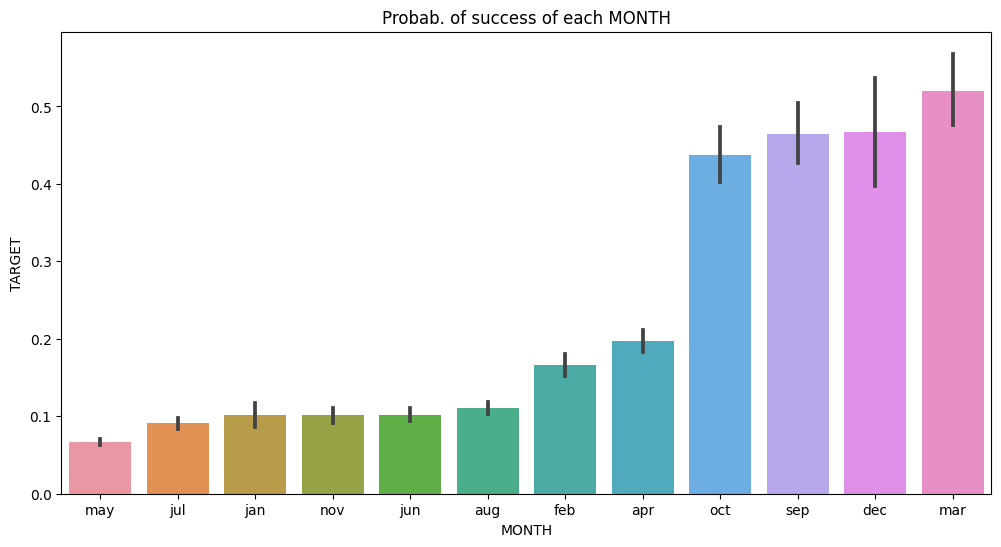

In [43]:
#PLOTTING CONVERSION RATE : MONTH
job_conversion_rates = df.groupby('mon')['y'].mean()
sorted_jobs = job_conversion_rates.reset_index().sort_values('y')['mon']
plt.figure(figsize=(12,6))
plt.title('Probab. of success of each MONTH')
sns.barplot(x='mon', y='y', data=df, order=sorted_jobs)
plt.xlabel("MONTH")
plt.ylabel("TARGET")

In [44]:
# Label encoding
df['mon']=df['mon'].map({'may':0, 'jul':1, 'jan':2, 'nov':3, 'jun':4, 'aug':5,
                         'feb':6, 'apr':7, 'oct':8, 'sep':9, 'dec':10, 'mar':11})

Text(0, 0.5, 'TARGET')

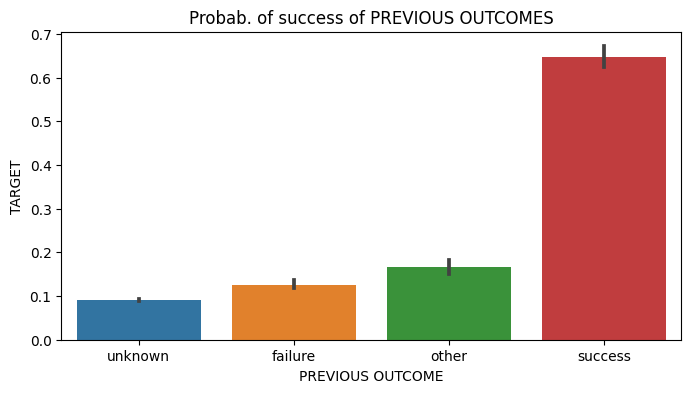

In [45]:
#PLOTTING CONVERSION RATE : PREVIOUS OUTCOME
job_conversion_rates = df.groupby('prev_outcome')['y'].mean()
sorted_jobs = job_conversion_rates.reset_index().sort_values('y')['prev_outcome']
plt.figure(figsize=(8,4))
plt.title('Probab. of success of PREVIOUS OUTCOMES')
sns.barplot(x='prev_outcome', y='y', data=df, order=sorted_jobs)
plt.xlabel("PREVIOUS OUTCOME")
plt.ylabel("TARGET")

In [46]:
# Label encoding
df['prev_outcome']=df['prev_outcome'].map({'unknown':0, 'failure':1, 'other':2, 'success':3})

Plotting numerical columns

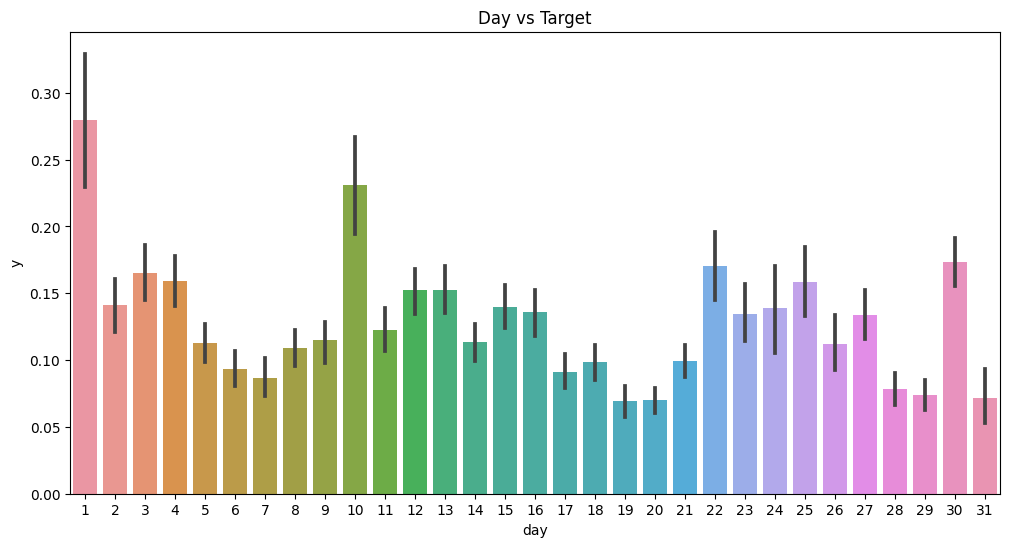

In [47]:
#Plotting Day column
plt.figure(figsize=(12,6))
sns.barplot(x='day', y='y', data=df, order=df.groupby('day')['y'].mean().reset_index().sort_values('day')['day'])
plt.title("Day vs Target")
plt.show()

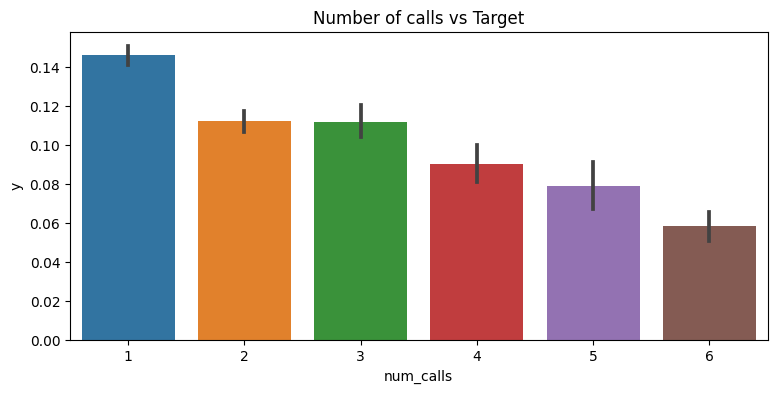

In [48]:
#Plotting Number of calls column
plt.figure(figsize=(9,4))
sns.barplot(x='num_calls', y='y', data=df, order=df.groupby('num_calls')['y'].mean().reset_index().sort_values('num_calls')['num_calls'])
plt.title("Number of calls vs Target")
plt.show()

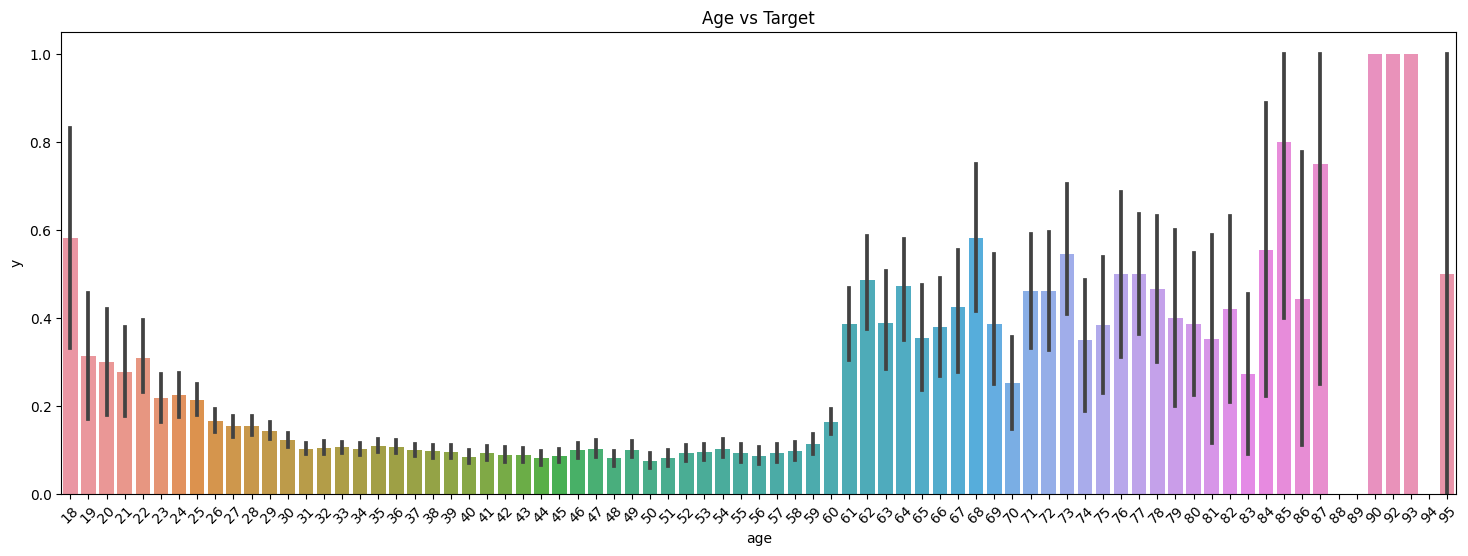

In [49]:
#Plotting Age column
plt.figure(figsize=(18,6))
sns.barplot(x='age', y='y', data=df, order=df.groupby('age')['y'].mean().reset_index().sort_values('age')['age'])
plt.title("Age vs Target")
plt.xticks(rotation=45)
plt.show()

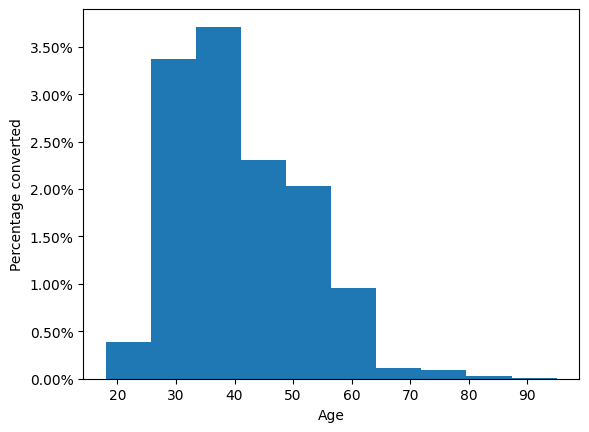

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.ticker import PercentFormatter

# plt.hist(df['age'], stacked=True, density=True)

# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
# plt.xlabel("Age")
# plt.ylabel("Percentage converted")
# plt.show()

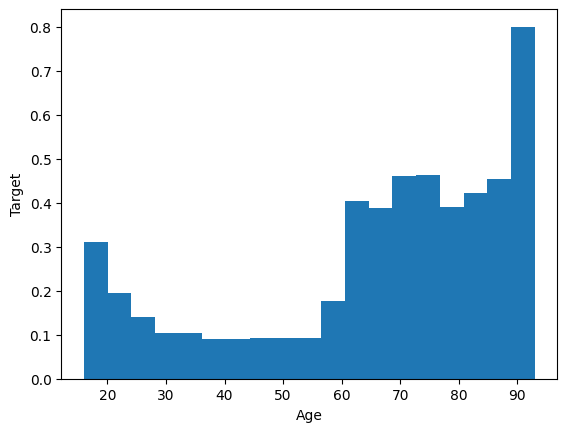

In [52]:
bins=np.linspace(df.age.min(),df.age.max(),20)
c=np.digitize(df.age,bins)
plt.bar(bins[:-1], [np.mean(df.y.values[c == i]) for i in range(1, len(bins))], width = bins[1] - bins[0])
plt.xlabel("Age")
plt.ylabel("Target")
plt.show()

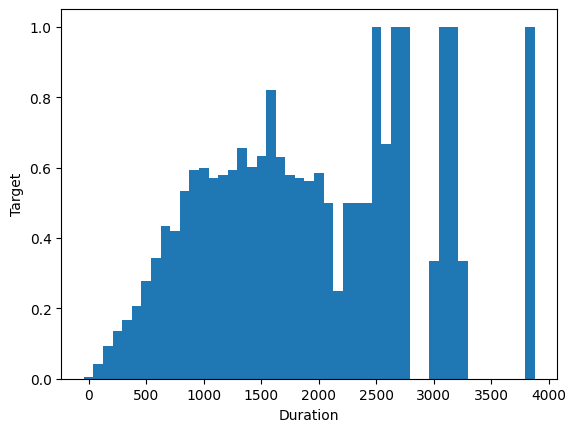

In [53]:
bins=np.linspace(df.dur.min(),df.dur.max(),60)
c=np.digitize(df.dur,bins)
plt.bar(bins[:-1], [np.mean(df.y.values[c == i]) for i in range(1, len(bins))], width = bins[1] - bins[0])
plt.xlabel("Duration")
plt.ylabel("Target")
plt.show()

# TARGET & FEATURE

---

# X AND Y


In [54]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,0,5,0,261,1,0,0
1,44,4,2,1,0,5,0,151,1,0,0
2,33,1,0,1,0,5,0,76,1,0,0
3,47,0,0,1,0,5,0,92,1,0,0
4,33,0,2,1,0,5,0,198,1,0,0


In [55]:
X=df[['age','job','marital','education_qual','call_type','day','mon','dur','num_calls','prev_outcome']].values
y=df['y'].values

In [56]:
df['y'].value_counts()

0    39913
1     5289
Name: y, dtype: int64

Imbalanced data

**Splitting, Balancing & Scaling the data**

In [57]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=0, stratify=y)

In [58]:
#Balancing the data
smt=SMOTEENN(sampling_strategy='all')
x_train,y_train=smt.fit_resample(x_train,y_train)

In [59]:
#Scaling the data
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [60]:
np.array(np.unique(y_train, return_counts=True)).T

array([[    0, 21964],
       [    1, 28439]])

**MODELLING**

***i. Logistic Regression***

In [61]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)
y_pred=lr.predict(x_test)

In [62]:
lr.coef_

array([[-0.04541442,  0.22834051, -0.26914431, -0.94126978,  0.22818081,
        -0.023205  ,  0.37141662,  0.01051174, -0.6049604 ,  0.73426223]])

In [63]:
lr.intercept_

array([-0.97086414])

In [64]:
#Evaluation Metric
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Test Accuracy Score: ", lr.score(x_test,y_test)) # accuracy
#print("Training Accuracy Score: ", lr.score(x_train,y_train))
#confusion_matrix(y_test,y_pred)
print("F1 Score:", f1_score(y_test,y_pred)) # f1 score
# # lr.score(x_test,y_test)
# plot_roc_curve(logistic_regression, x_test, y_test) #AUROC
# accuracy_score(y_test,y_pred) #accuracy

Test Accuracy Score:  0.7442704185470312
F1 Score: 0.44593558282208584


In [65]:
 print("Precision :{0}".format(precision_score(y_test,lr.predict(x_test))))

Precision :0.29866461222393426


In [66]:
print("Recall :", round(recall_score(y_test, lr.predict(x_test)), 2))

Recall : 0.88


***ii. Decision Tree***

In [67]:
from sklearn.tree import DecisionTreeClassifier

for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(x_train, y_train)
  # Predict test set labels
  y_pred = dt.predict(x_test)

  # Compute test set accuracy
  acc = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  val_acc=cross_val_score(dt, x_train, y_train, cv=10, scoring="f1")
  print("Depth :",depth, " Accuracy: {:.2f}".format(acc), " F1-score: {:.2f}".format(f1), " Cross Validation Score :", np.mean(val_acc))


Depth : 1  Accuracy: 0.64  F1-score: 0.34  Cross Validation Score : 0.8160307913656707
Depth : 2  Accuracy: 0.58  F1-score: 0.34  Cross Validation Score : 0.8400277723593023
Depth : 3  Accuracy: 0.67  F1-score: 0.40  Cross Validation Score : 0.8809915078157096
Depth : 4  Accuracy: 0.70  F1-score: 0.42  Cross Validation Score : 0.8854221893770143
Depth : 5  Accuracy: 0.73  F1-score: 0.44  Cross Validation Score : 0.8874299609321998
Depth : 6  Accuracy: 0.72  F1-score: 0.44  Cross Validation Score : 0.9051323085414694
Depth : 7  Accuracy: 0.77  F1-score: 0.47  Cross Validation Score : 0.9145908254356007
Depth : 8  Accuracy: 0.78  F1-score: 0.49  Cross Validation Score : 0.9212378333578565
Depth : 9  Accuracy: 0.79  F1-score: 0.50  Cross Validation Score : 0.9287984132151152
Depth : 10  Accuracy: 0.79  F1-score: 0.49  Cross Validation Score : 0.9330263545876093
Depth : 20  Accuracy: 0.82  F1-score: 0.50  Cross Validation Score : 0.9540001332193082
Depth : 30  Accuracy: 0.83  F1-score: 0.5

In [68]:
dt=DecisionTreeClassifier(max_depth=60)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print("Test Accuracy Score: ", dt.score(x_test,y_test)) # accuracy
print("Training Accuracy Score: ", dt.score(x_train,y_train))
print("F1 Score:", f1_score(y_test,y_pred)) # f1 score

Test Accuracy Score:  0.8285992390053978
Training Accuracy Score:  1.0
F1 Score: 0.5104877432398282


Feature Importance

In [69]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [70]:
x_test=pd.DataFrame(x_test, columns=['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
                                     'dur', 'num_calls', 'prev_outcome'])

# dtc=DecisionTreeClassifier(max_depth=20)
# dtc.fit(x_train,y_train)

# importance=dtc.feature_importances_
# feature_importances=list(zip(importance,x_test.columns))
# feature_importances.sort(key=lambda x:x[1], reverse=True)
# for feature, importance in feature_importances:
#   print(feature , ":" , importance)



0.04295651715538608 : prev_outcome
0.024434934384151837 : num_calls
0.14972890388096707 : mon
0.009805522072178535 : marital
0.036766871076761014 : job
0.008491938075300057 : education_qual
0.4975239061386092 : dur
0.08164753236496727 : day
0.08215159868369637 : call_type
0.06649227616798248 : age


In [71]:
dt = DecisionTreeClassifier(max_depth = 60)
# Fit dt to the training set
dt.fit(x_train, y_train)
importance = dt.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,x_test.columns)) # it calculates the feature importances based on IG

[(0.068668004687032, 'age'),
 (0.03715208535710074, 'job'),
 (0.010374427753916388, 'marital'),
 (0.008717774708408791, 'education_qual'),
 (0.0812149209900068, 'call_type'),
 (0.08252316696733757, 'day'),
 (0.14779698802118296, 'mon'),
 (0.49610300085215187, 'dur'),
 (0.024326094213453876, 'num_calls'),
 (0.043123536449408986, 'prev_outcome')]

***iii. Knn ALgorithm***

In [72]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(x_train_s,y_train) # training the model
  print("K value  : " , i, " Train score : ", knn.score(x_train_s,y_train) , " CV score : ", np.mean(cross_val_score(knn, x_train_s, y_train, cv=10, scoring="f1"))) #predicting using the model

K value  :  1  Train score :  1.0  CV score :  0.9436589333943655
K value  :  2  Train score :  0.9784338233835288  CV score :  0.9286263830161283
K value  :  3  Train score :  0.9646251215205444  CV score :  0.939132936778589
K value  :  4  Train score :  0.9572644485447295  CV score :  0.9327638506398215
K value  :  5  Train score :  0.9509553002797453  CV score :  0.9349288394939741
K value  :  6  Train score :  0.9465508005475864  CV score :  0.93049173098364
K value  :  7  Train score :  0.9422058210820784  CV score :  0.9313521238445226
K value  :  8  Train score :  0.9392099676606551  CV score :  0.927087906281662
K value  :  9  Train score :  0.9370077177945757  CV score :  0.9289128457583287
K value  :  10  Train score :  0.9334563418844116  CV score :  0.9262235287800445
K value  :  20  Train score :  0.9198857210880305  CV score :  0.920499927994701
K value  :  50  Train score :  0.90736662500248  CV score :  0.9122740817492947


In [73]:
knn = KNeighborsClassifier(5)
knn.fit(x_train_s,y_train)  #using scaled data
y_pred=knn.predict(x_test_s)

#knn.predict(scaler.transform([[0.6,-0.4]]))
#print(knn.predict(scaler.transform([[3,-2]])))
#knn.score(x_test,y_test)

print("Test Accuracy Score: ", knn.score(x_test_s,y_test)) # accuracy
print("Training Accuracy Score: ", knn.score(x_train_s,y_train))
print("F1 Score:", f1_score(y_test,y_pred)) # f1 score

Test Accuracy Score:  0.80373418281568
Training Accuracy Score:  0.9509553002797453
F1 Score: 0.5006753714542999


***iv. XGBOOST Algorithm***

In [74]:
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,0.9,1.0]:
  model=xgb.XGBClassifier(learning_rate=i, n_estimators=100, verbosity=0)
  model.fit(x_train,y_train)
  model.score(x_test,y_test)

  print("Learning rate: ",i," Train Score: ",model.score(x_train,y_train)," CV Score: ",np.mean(cross_val_score(model, x_train, y_train, cv=10, scoring="f1")))

Learning rate:  0.01  Train Score:  0.9152233002003849  CV Score:  0.9223534213746387
Learning rate:  0.02  Train Score:  0.9221078110429934  CV Score:  0.9290462308873053
Learning rate:  0.03  Train Score:  0.9294288038410412  CV Score:  0.9346443816930845
Learning rate:  0.04  Train Score:  0.9344681864174752  CV Score:  0.9385845126108364
Learning rate:  0.05  Train Score:  0.940201972104835  CV Score:  0.9430368005444605
Learning rate:  0.06  Train Score:  0.9436938277483483  CV Score:  0.9455968439633594
Learning rate:  0.07  Train Score:  0.9468682419697241  CV Score:  0.9481937918681924
Learning rate:  0.08  Train Score:  0.9506775390353749  CV Score:  0.9499488659708268
Learning rate:  0.09  Train Score:  0.9527805884570363  CV Score:  0.9510716885542901
Learning rate:  0.1  Train Score:  0.9548836378786977  CV Score:  0.9520415027441917
Learning rate:  0.11  Train Score:  0.9563121242783168  CV Score:  0.9531529434425418
Learning rate:  0.12  Train Score:  0.9563914846338512  

In [75]:
xgbc=xgb.XGBClassifier(learning_rate=0.9, n_estimators=100, verbosity=0)
xgbc.fit(x_train,y_train)
y_pred= xgbc.predict(x_test)

print("Test Accuracy Score: ", xgbc.score(x_test,y_test)) # accuracy
print("Training Accuracy Score: ", xgbc.score(x_train,y_train))
print("F1 Score:", f1_score(y_test,y_pred)) # f1 score

Test Accuracy Score:  0.8449694717281656
Training Accuracy Score:  0.9980159911116402
F1 Score: 0.5569044006069803


Feature Importance

In [76]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [77]:
x_test=pd.DataFrame(x_test, columns=['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
                                     'dur', 'num_calls', 'prev_outcome'])


xgbc=xgb.XGBClassifier(learning_rate=0.9, n_estimators=100, verbosity=0)
# Fit dt to the training set
xgbc.fit(x_train,y_train)
importance = dt.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,x_test.columns)) # it calculates the feature importances based on IG

[(0.068668004687032, 'age'),
 (0.03715208535710074, 'job'),
 (0.010374427753916388, 'marital'),
 (0.008717774708408791, 'education_qual'),
 (0.0812149209900068, 'call_type'),
 (0.08252316696733757, 'day'),
 (0.14779698802118296, 'mon'),
 (0.49610300085215187, 'dur'),
 (0.024326094213453876, 'num_calls'),
 (0.043123536449408986, 'prev_outcome')]

***v. Random Forest ALgorithm***

In [78]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 5, max_features='sqrt')
rf.fit(x_train,y_train)

y_predict=rf.predict(x_test)

In [79]:
for depth in range(1,11):
  rf = RandomForestClassifier(n_estimators = 200, max_depth = 5, max_features='sqrt')
  rf.fit(x_train,y_train)

  cvs=cross_val_score(rf, x_train, y_train, cv=10, scoring="f1")

  print("Depth: ",depth," Train Accuracy: ", rf.score(x_train, y_train), " CV Score: ", np.mean(cvs))

Depth:  1  Train Accuracy:  0.8989345872269507  CV Score:  0.9121578142721122
Depth:  2  Train Accuracy:  0.902922445092554  CV Score:  0.9116508917838075
Depth:  3  Train Accuracy:  0.8995893101601096  CV Score:  0.9120204077855588
Depth:  4  Train Accuracy:  0.902823244648136  CV Score:  0.9110919064937522
Depth:  5  Train Accuracy:  0.9008193956708926  CV Score:  0.9118886028055495
Depth:  6  Train Accuracy:  0.903517647759062  CV Score:  0.9117575062621622
Depth:  7  Train Accuracy:  0.8994305894490408  CV Score:  0.9122031606999899
Depth:  8  Train Accuracy:  0.9004027538043371  CV Score:  0.9119098690545616
Depth:  9  Train Accuracy:  0.8963355355831994  CV Score:  0.9116291025302001
Depth:  10  Train Accuracy:  0.900204352915501  CV Score:  0.9113711546538437


In [80]:
random = RandomForestClassifier(n_estimators = 200, max_depth = 8, max_features='sqrt')
random.fit(x_train,y_train)
y_pred=random.predict(x_test)

print("Test Accuracy Score: ", random.score(x_test,y_test)) # accuracy
print("Training Accuracy Score: ", random.score(x_train,y_train))
print("F1 Score:", f1_score(y_test,y_pred)) # f1 score

Test Accuracy Score:  0.7692239624811964
Training Accuracy Score:  0.9229807749538718
F1 Score: 0.4827449424831416
